# Componentes y suavizamiento de una serie temporal

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/data.csv",
                 parse_dates=['Fecha'],
                 index_col='Fecha')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 1994-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exportaciones  336 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


## Componentes de una serie temporal

### Evaluación gráfica

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Evolución de las exportaciones:

Text(0, 0.5, 'Valor')

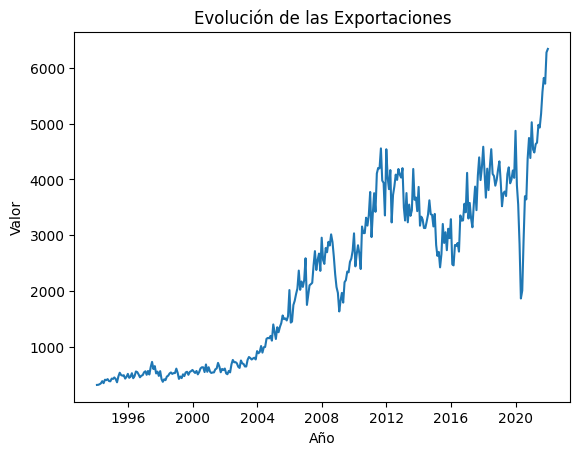

In [5]:
# Crear el primer gráfico
plt.plot(df["Exportaciones"])

# Configurar el título y etiquetas del eje
plt.title('Evolución de las Exportaciones')
plt.xlabel('Año')
plt.ylabel('Valor')

Gráfico para evaluar estacionalidad de la serie temporal:

Text(0, 0.5, 'Exportaciones')

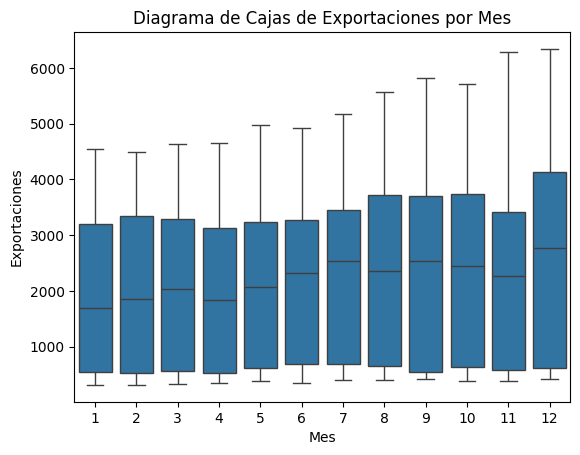

In [6]:
# Crear un diagrama de cajas para cada mes
sns.boxplot(x=df.index.month, y=df['Exportaciones'])

# Configurar el título y etiquetas del eje
plt.title('Diagrama de Cajas de Exportaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Exportaciones')

### Descomposición de la serie temporal

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Descomposición multiplicativa

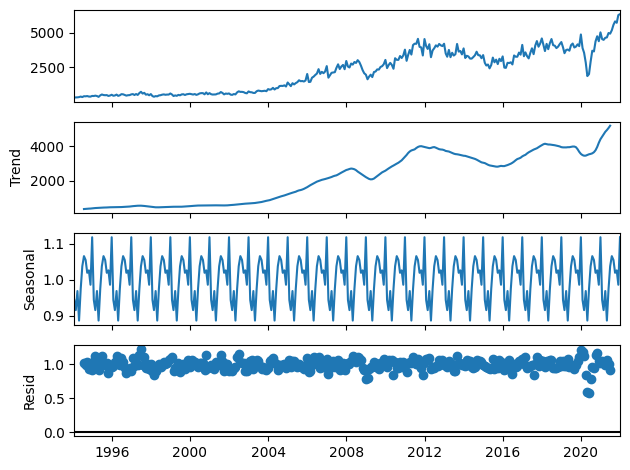

In [8]:
df_decomposed = seasonal_decompose(
    df,
    model='mul'
)

df_decomposed.plot()
plt.show()

Descomposición mostrada de manera aislada:

<Axes: xlabel='Fecha'>

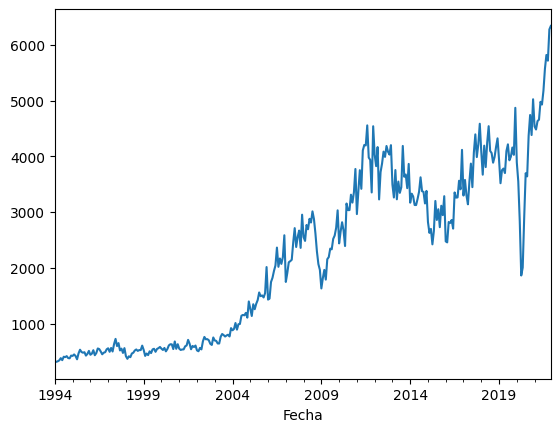

In [9]:
observada = df_decomposed.observed
observada.plot()

<Axes: xlabel='Fecha'>

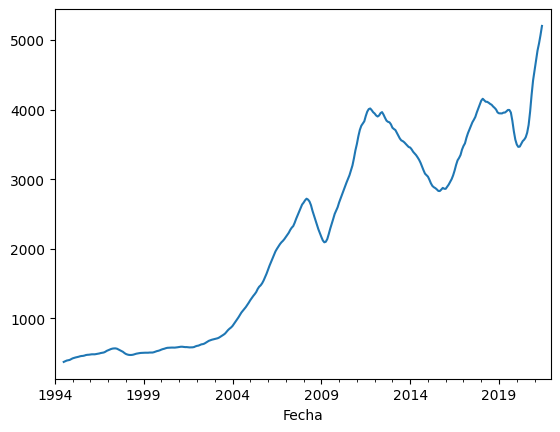

In [10]:
tendencia = df_decomposed.trend
tendencia.plot()

<Axes: xlabel='Fecha'>

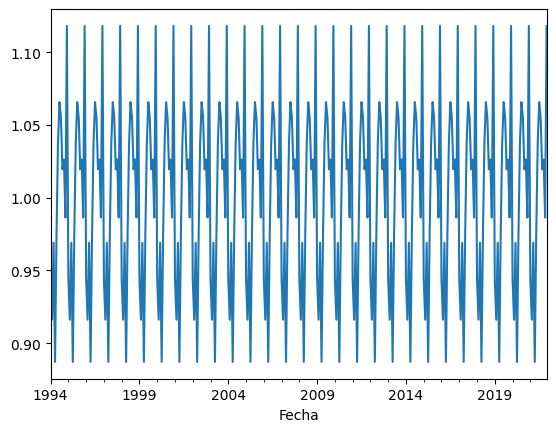

In [11]:
estacionalidad = df_decomposed.seasonal
estacionalidad.plot()

<Axes: xlabel='Fecha'>

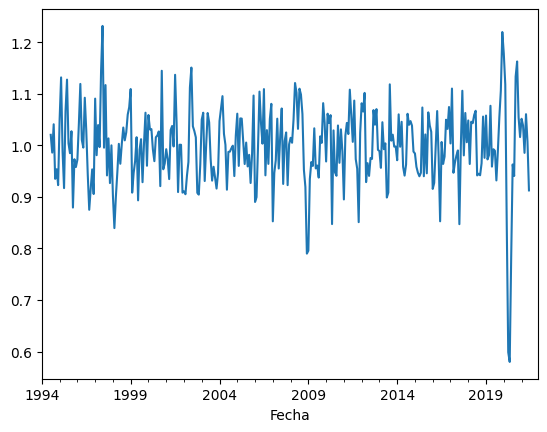

In [12]:
residuos = df_decomposed.resid
residuos.plot()

Resumen de todas las componentes multiplicativas de la serie temporal:

In [13]:
componentes = pd.concat([observada, tendencia, estacionalidad, residuos], axis=1)
componentes

,0,trend,seasonal,resid
Fecha,,,,
1994-01-31,312.705970,NaN,0.944233,NaN
1994-02-28,314.740923,NaN,0.916145,NaN
1994-03-31,324.470030,NaN,0.969014,NaN
1994-04-30,341.008845,NaN,0.887110,NaN
1994-05-31,380.045522,NaN,0.974686,NaN
...,...,...,...,...
2021-08-31,5568.497659,NaN,1.054982,NaN
2021-09-30,5818.521684,NaN,1.019553,NaN
2021-10-31,5715.738609,NaN,1.026310,NaN


#### Descomposición aditiva

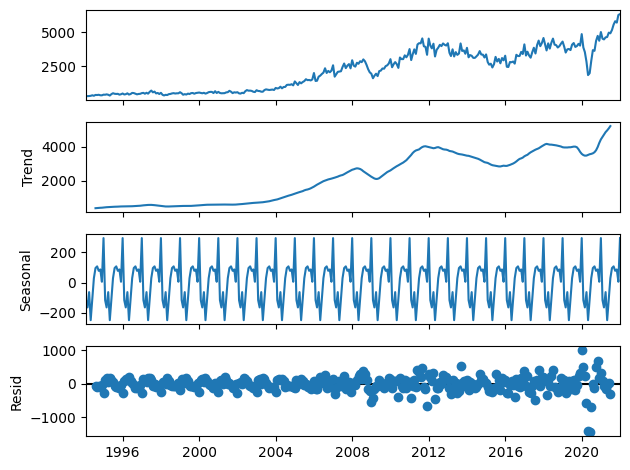

In [14]:
df_decomposed = seasonal_decompose(
    df,
    model='add'
)

df_decomposed.plot()
plt.show()

Descomposición mostrada de manera aislada:

<Axes: xlabel='Fecha'>

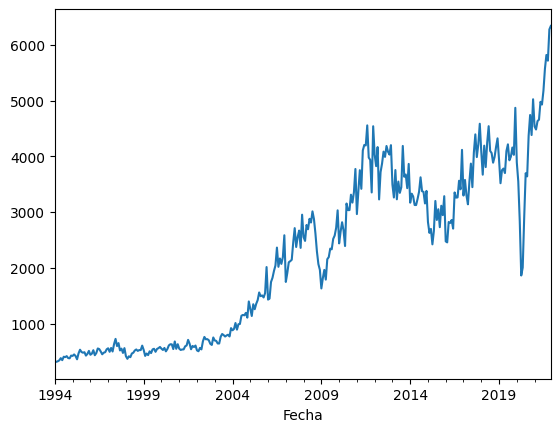

In [15]:
observada = df_decomposed.observed
observada.plot()

<Axes: xlabel='Fecha'>

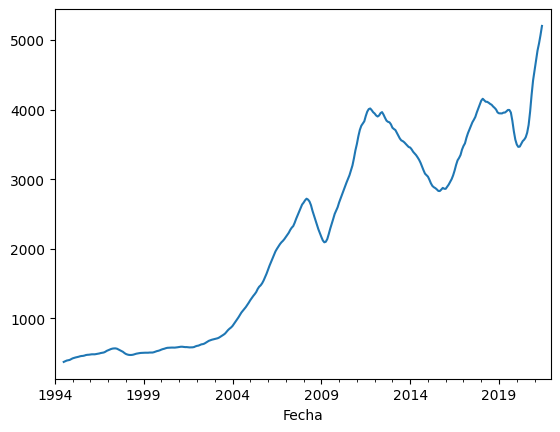

In [16]:
tendencia = df_decomposed.trend
tendencia.plot()

<Axes: xlabel='Fecha'>

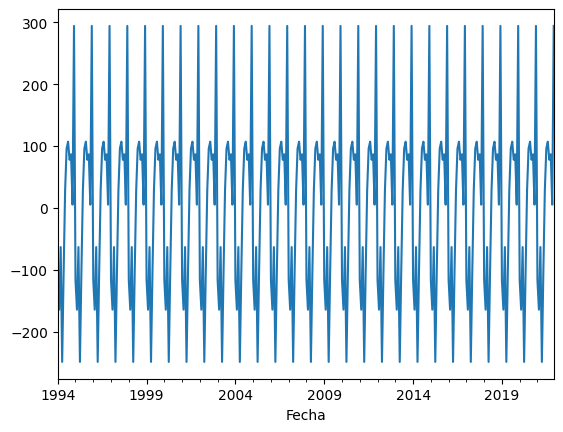

In [17]:
estacionalidad = df_decomposed.seasonal
estacionalidad.plot()

<Axes: xlabel='Fecha'>

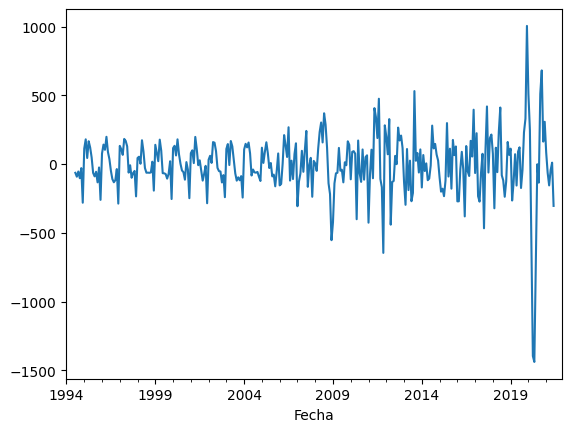

In [18]:
residuos = df_decomposed.resid
residuos.plot()

Resumen de todas las componentes aditivias de la serie temporal:

In [19]:
componentes = pd.concat([observada, tendencia, estacionalidad, residuos], axis=1)
componentes

,0,trend,seasonal,resid
Fecha,,,,
1994-01-31,312.705970,NaN,-116.551326,NaN
1994-02-28,314.740923,NaN,-164.338959,NaN
1994-03-31,324.470030,NaN,-63.219101,NaN
1994-04-30,341.008845,NaN,-248.780338,NaN
1994-05-31,380.045522,NaN,-102.971781,NaN
...,...,...,...,...
2021-08-31,5568.497659,NaN,107.025228,NaN
2021-09-30,5818.521684,NaN,77.795427,NaN
2021-10-31,5715.738609,NaN,86.673470,NaN


## Estabilización de la variabilidad de la serie temporal

### Aplicando logaritmo

In [20]:
df['log_Exportaciones'] = np.log(df['Exportaciones'])

<Axes: xlabel='Fecha'>

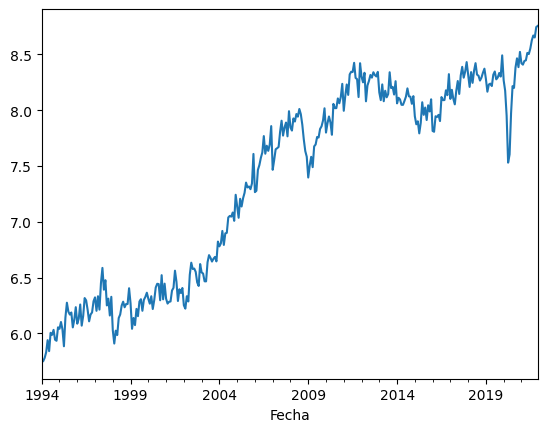

In [21]:
df['log_Exportaciones'].plot()

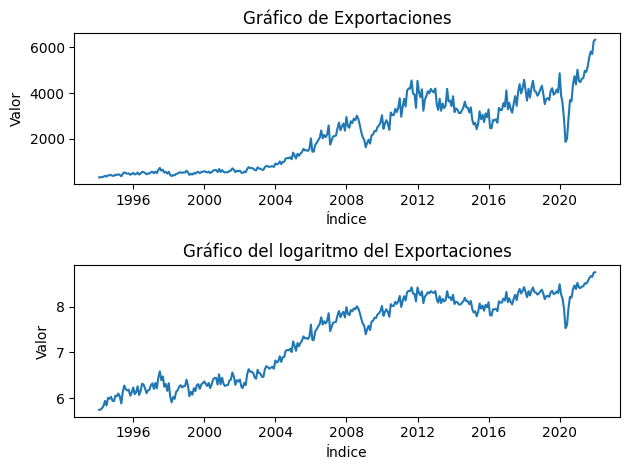

In [22]:
# Configurar la disposición de los subgráficos
plt.subplot(2, 1, 1)

# Crear el primer gráfico
plt.plot(df["Exportaciones"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico de Exportaciones')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Cambiar a la siguiente celda de la cuadrícula
plt.subplot(2, 1, 2)

# Crear el segundo gráfico
plt.plot(df["log_Exportaciones"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico del logaritmo del Exportaciones')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Aplicando primera diferencia a la serie temporal

<Axes: xlabel='Fecha'>

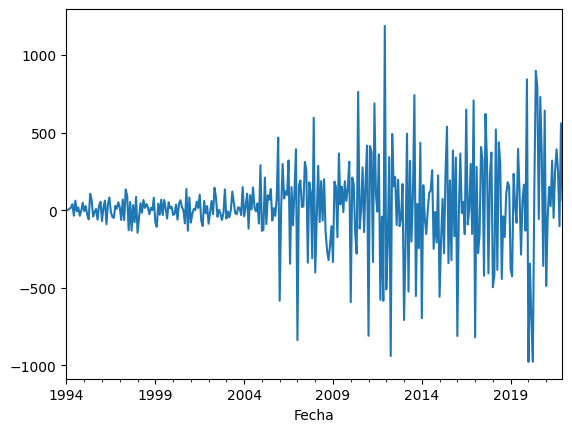

In [23]:
# Calcular la primera diferencia de la columna 'Desembolo'
df['Exportaciones_1raDiferencia'] = df['Exportaciones'].diff()

# Mostrar la primera diferencia
df['Exportaciones_1raDiferencia'].plot()

## Eliminando estacionalidad a la serie temporal

<Axes: xlabel='Fecha'>

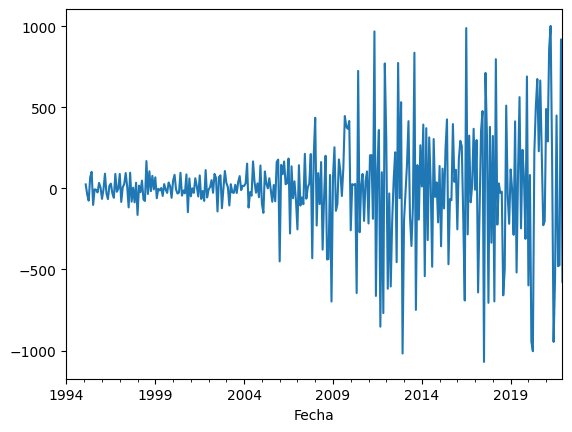

In [24]:
# Calcular la diferencia entre cada valor y el valor que está 12 pasos atrás
df['tsstationary'] = df['Exportaciones_1raDiferencia'].diff(periods=12)
df['tsstationary'].plot()

## Suavizamiento de una serie temporal

Se recomienda leer la referencia "metodosSuavizado.pdf" de esta práctica dirigida.

In [25]:
resumen = df[['Exportaciones']]
resumen.head()

,Exportaciones
Fecha,
1994-01-31,312.705970
1994-02-28,314.740923
1994-03-31,324.470030
1994-04-30,341.008845
1994-05-31,380.045522


### Método de media móvil

#### Con una ventana de periodos igual a 3

Media móvil simple:

In [26]:
def calcular_medias_moviles_y_graficar(dataframe, columna, ventanas):
    """
    Calcula las medias móviles simples de una columna en un dataframe para diferentes tamaños de ventana,
    imprime el RSME para cada ventana y grafica la serie original y las series con las medias móviles.
    
    Parámetros:
    - dataframe: El DataFrame de pandas que contiene los datos.
    - columna: El nombre de la columna (string) que contiene la serie temporal a analizar.
    - ventanas: Una lista de enteros que representan los tamaños de las ventanas para calcular las medias móviles.
    """
    # Asegurar copia para no modificar el original
    df = dataframe.copy()
    
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df[columna], label='Serie Original', color='blue', alpha=0.75)
    
    # Calcular la media móvil simple para cada tamaño de ventana y graficar
    for ventana in ventanas:
        df[f'SMA_{ventana}'] = df[columna].rolling(window=ventana).mean()
        
        # Calcular RSME
        rsme = np.sqrt(np.nanmean((df[columna] - df[f'SMA_{ventana}'])**2))
        print(f"El valor de RSME para ventana de {ventana} es: {rsme}")
        
        # Graficar la media móvil
        plt.plot(df[f'SMA_{ventana}'], label=f'SMA {ventana} períodos', linestyle='--')
    
    # Finalizar configuraciones del gráfico
    plt.title('Serie Original vs. Medias Móviles Simples')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

El valor de RSME para ventana de 3 es: 191.20500032534767
El valor de RSME para ventana de 4 es: 225.50783308761055
El valor de RSME para ventana de 5 es: 262.47362369339476


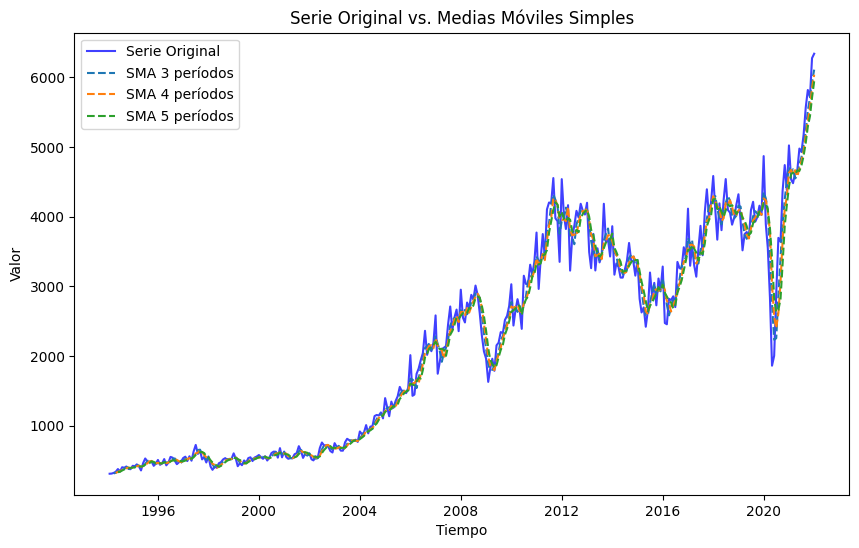

In [27]:
calcular_medias_moviles_y_graficar(df, 'Exportaciones', [3, 4, 5])

Media móvil centrada:

In [28]:
def calcular_medias_moviles_y_graficar(dataframe, columna, ventanas):
    """
    Calcula las medias móviles centradas de una columna en un dataframe para diferentes tamaños de ventana,
    imprime el RSME para cada ventana y grafica la serie original y las series con las medias móviles.
    
    Parámetros:
    - dataframe: El DataFrame de pandas que contiene los datos.
    - columna: El nombre de la columna (string) que contiene la serie temporal a analizar.
    - ventanas: Una lista de enteros que representan los tamaños de las ventanas para calcular las medias móviles.
    """
    # Asegurar copia para no modificar el original
    df = dataframe.copy()
    
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df[columna], label='Serie Original', color='blue', alpha=0.75)
    
    # Calcular la media móvil simple para cada tamaño de ventana y graficar
    for ventana in ventanas:
        df[f'SMA_{ventana}'] = df[columna].rolling(window=ventana, center=True).mean()
        
        # Calcular RSME
        rsme = np.sqrt(np.nanmean((df[columna] - df[f'SMA_{ventana}'])**2))
        print(f"El valor de RSME para ventana de {ventana} es: {rsme}")
        
        # Graficar la media móvil
        plt.plot(df[f'SMA_{ventana}'], label=f'SMA {ventana} períodos', linestyle='--')
    
    # Finalizar configuraciones del gráfico
    plt.title('Serie Original vs. Medias Móviles Simples')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

El valor de RSME para ventana de 3 es: 157.58398216222864
El valor de RSME para ventana de 4 es: 179.03773989236353
El valor de RSME para ventana de 5 es: 181.0690553934178


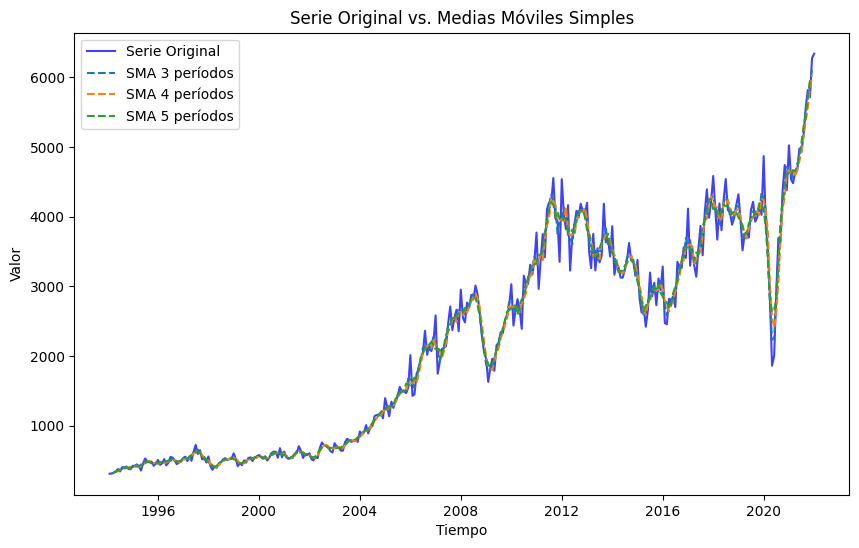

In [29]:
calcular_medias_moviles_y_graficar(df, 'Exportaciones', [3, 4, 5])

### Método de suavizamiento exponencial

Se recomienda ver el siguiente video [Exponential Smoothing Forecast|Practical Time Series analysis (Machine Learning) in sktime (Python)](https://www.youtube.com/watch?v=F0mpcRISFOU).

In [30]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [31]:
from sktime.forecasting.model_selection import temporal_train_test_split
train, test = temporal_train_test_split(df['Exportaciones'], test_size = 36)

In [32]:
fh = list(range(1,37))

#### Suavizado exponencial simple

In [33]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)
simple_exp.fit(train)
pred = simple_exp.predict(fh)
pred

p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\utils\datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh

2019-01-31    4210.095784
2019-02-28    4210.095784
2019-03-31    4210.095784
2019-04-30    4210.095784
2019-05-31    4210.095784
2019-06-30    4210.095784
2019-07-31    4210.095784
2019-08-31    4210.095784
2019-09-30    4210.095784
2019-10-31    4210.095784
2019-11-30    4210.095784
2019-12-31    4210.095784
2020-01-31    4210.095784
2020-02-29    4210.095784
2020-03-31    4210.095784
2020-04-30    4210.095784
2020-05-31    4210.095784
2020-06-30    4210.095784
2020-07-31    4210.095784
2020-08-31    4210.095784
2020-09-30    4210.095784
2020-10-31    4210.095784
2020-11-30    4210.095784
2020-12-31    4210.095784
2021-01-31    4210.095784
2021-02-28    4210.095784
2021-03-31    4210.095784
2021-04-30    4210.095784
2021-05-31    4210.095784
2021-06-30    4210.095784
2021-07-31    4210.095784
2021-08-31    4210.095784
2021-09-30    4210.095784
2021-10-31    4210.095784
2021-11-30    4210.095784
2021-12-31    4210.095784
Freq: ME, Name: Exportaciones, dtype: float64

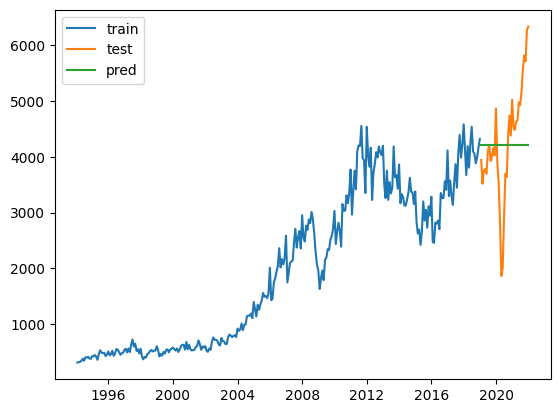

In [34]:
def plot_ys(train, test, pred, labels=["train", "test", "pred"]):
    plt.plot(train, label=labels[0])
    plt.plot(test, label=labels[1])
    plt.plot(pred, label=labels[2])
    plt.legend()
    plt.show()
    
plot_ys(train, test, pred)

#### Suavizado exponencial doble

In [35]:
doble_exp = ExponentialSmoothing(trend='add', seasonal=None)
doble_exp.fit(train)
pred = doble_exp.predict(fh)
pred

p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\utils\datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh

2019-01-31    4227.706396
2019-02-28    4239.992295
2019-03-31    4252.278193
2019-04-30    4264.564091
2019-05-31    4276.849989
2019-06-30    4289.135887
2019-07-31    4301.421785
2019-08-31    4313.707683
2019-09-30    4325.993581
2019-10-31    4338.279479
2019-11-30    4350.565378
2019-12-31    4362.851276
2020-01-31    4375.137174
2020-02-29    4387.423072
2020-03-31    4399.708970
2020-04-30    4411.994868
2020-05-31    4424.280766
2020-06-30    4436.566664
2020-07-31    4448.852562
2020-08-31    4461.138461
2020-09-30    4473.424359
2020-10-31    4485.710257
2020-11-30    4497.996155
2020-12-31    4510.282053
2021-01-31    4522.567951
2021-02-28    4534.853849
2021-03-31    4547.139747
2021-04-30    4559.425646
2021-05-31    4571.711544
2021-06-30    4583.997442
2021-07-31    4596.283340
2021-08-31    4608.569238
2021-09-30    4620.855136
2021-10-31    4633.141034
2021-11-30    4645.426932
2021-12-31    4657.712830
Freq: ME, Name: Exportaciones, dtype: float64

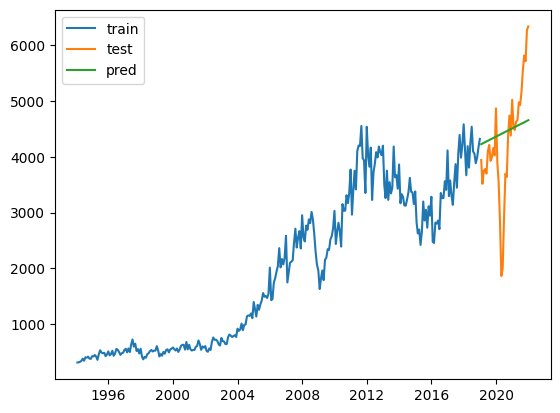

In [36]:
def plot_ys(train, test, pred, labels=["train", "test", "pred"]):
    plt.plot(train, label=labels[0])
    plt.plot(test, label=labels[1])
    plt.plot(pred, label=labels[2])
    plt.legend()
    plt.show()
    
plot_ys(train, test, pred)

#### Suavizado exponencial triple

In [52]:
triple_exp = ExponentialSmoothing(trend='add', seasonal='add')
triple_exp.fit(train)
pred = triple_exp.predict(fh)
pred

p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\utils\datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh

2019-01-31    3734.647546
2019-02-28    3770.155394
2019-03-31    4046.854513
2019-04-30    3850.558055
2019-05-31    4151.986994
2019-06-30    4320.968595
2019-07-31    4270.943676
2019-08-31    4429.307644
2019-09-30    4301.424132
2019-10-31    4268.296545
2019-11-30    4185.232866
2019-12-31    4508.519565
Freq: ME, Name: Exportaciones, dtype: float64

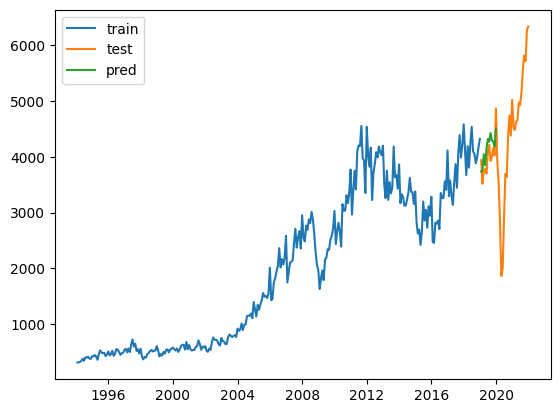

In [54]:
def plot_ys(train, test, pred, labels=["train", "test", "pred"]):
    plt.plot(train, label=labels[0])
    plt.plot(test, label=labels[1])
    plt.plot(pred, label=labels[2])
    plt.legend()
    plt.show()
    
plot_ys(train, test, pred)